This code covers the data processing steps involved in aggregation of NYPD Moving Summons data. 

#### Data Inputs
Excel files for the years 2013, 2014 and 2015 are downloaded from the NYPD website are used as inputs. The source data for each year is available at precinct level and number of summons issued are aggregated for each moving summon type level. Downloaded data is shared in the data processing folder under the file names 2015_12_sum_excel, 2014_12_sum_excel and 2013_12_sum_excel for 2015, 2014 and 2013 years respectively.

NYPD Source: http://www.nyc.gov/html/nypd/html/traffic_reports/traffic_summons_reports.shtml

#### Data Outputs
Output data from this code is at aggregated level with columns as type of moving summon issued, rows as individual precincts and the corresponding values include sum of summons issued combined for the years 2013, 2014 and 2015. This file output is further used in the final analysis to implement the regression analysis for traffic collisions.

In [1]:
# Required libraries
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


### Collating traffic moving summons for 2015 across precincts

In [2]:
# Getting filenames in the folder
files2015 = [f for f in listdir("NYPD_Summons_Data/2015_12_sum_excel") if isfile(join("NYPD_Summons_Data/2015_12_sum_excel", f))]

In [3]:
# Creating empty dataframe
columns = ['Precinct', 'Violation', 'Total_2015']
summons2015 = pd.DataFrame(columns=columns)
summons2015[['Precinct', 'Total_2015']] = summons2015[['Precinct', 'Total_2015']].astype(int)
summons2015['Violation'] = summons2015['Violation'].astype(str)
summons2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
Precinct      0 non-null int32
Violation     0 non-null object
Total_2015    0 non-null int32
dtypes: int32(2), object(1)
memory usage: 0.0+ bytes


In [4]:
# Extracting relevant data for each precinct and merging it with earlier created data frame
for i in range(len(files2015)):
    xl = pd.ExcelFile("NYPD_Summons_Data/2015_12_sum_excel/" + files2015[i])
    df = xl.parse("MovingViolations_1")
    df = df.dropna()
    df.drop(df.columns[1], axis=1, inplace=True)
    df.rename(columns={'Moving Violations': 'Violation', 'Unnamed: 2': 'Total_2015'}, inplace=True)
    df['Precinct'] = int(files2015[i][9:12])
    df = df[['Precinct', 'Violation', 'Total_2015']][2:35]
    df['Total_2015'] = df['Total_2015'].astype(int)
    summons2015 = pd.concat([summons2015, df], axis=0)

In [5]:
summons2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 5 to 37
Data columns (total 3 columns):
Precinct      2541 non-null int64
Violation     2541 non-null object
Total_2015    2541 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 69.5+ KB


In [7]:
summons2015.head()

,Precinct,Violation,Total_2015
5,1,Brake Lights (Defect.or Improper),12
6,1,"Bus Lane, Driving in",22
7,1,Cell Phone,2350
8,1,Commercial Veh on Pkwy,0
9,1,Defective Brakes,0


### Collating traffic moving summons for 2014 across precincts

In [8]:
# Getting filenames in the folder
files2014 = [f for f in listdir("NYPD_Summons_Data/2014_12_sum_excel") if isfile(join("NYPD_Summons_Data/2014_12_sum_excel", f))]

In [9]:
# Creating empty dataframe
columns = ['Precinct', 'Violation', 'Total_2014']
summons2014 = pd.DataFrame(columns=columns)
summons2014[['Precinct', 'Total_2014']] = summons2014[['Precinct', 'Total_2014']].astype(int)
summons2014['Violation'] = summons2014['Violation'].astype(str)
summons2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
Precinct      0 non-null int32
Violation     0 non-null object
Total_2014    0 non-null int32
dtypes: int32(2), object(1)
memory usage: 0.0+ bytes


In [10]:
# Extracting relevant data for each precinct and merging it with earlier created data frame
for i in range(len(files2014)):
    xl = pd.ExcelFile("NYPD_Summons_Data/2014_12_sum_excel/" + files2014[i])
    df = xl.parse(files2014[i][0:6])
    df = df.dropna()
    df.drop(df.columns[1], axis=1, inplace=True)
    df.rename(columns={'Moving Violations': 'Violation', 'Unnamed: 2': 'Total_2014'}, inplace=True)
    df['Precinct'] = int(files2014[i][0:3])
    df = df[['Precinct', 'Violation', 'Total_2014']][2:35]
    df['Total_2014'] = df['Total_2014'].astype(int)
    summons2014 = pd.concat([summons2014, df], axis=0)

In [11]:
summons2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 5 to 37
Data columns (total 3 columns):
Precinct      2541 non-null int64
Violation     2541 non-null object
Total_2014    2541 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 69.5+ KB


In [12]:
summons2014.head()

,Precinct,Violation,Total_2014
5,1,Brake Lights (Defect.or Improper),15
6,1,"Bus Lane, Driving in",33
7,1,Cell Phone,2468
8,1,Commercial Veh on Pkwy,0
9,1,Defective Brakes,1


### Collating traffic moving summons for 2013 across precincts

In [13]:
# Getting filenames in the folder
files2013 = [f for f in listdir("NYPD_Summons_Data/2013_12_sum_excel") if isfile(join("NYPD_Summons_Data/2013_12_sum_excel", f))]

In [14]:
# Creating empty dataframe
columns = ['Precinct', 'Violation', 'Total_2013']
summons2013 = pd.DataFrame(columns=columns)
summons2013[['Precinct', 'Total_2013']] = summons2013[['Precinct', 'Total_2013']].astype(int)
summons2013['Violation'] = summons2013['Violation'].astype(str)
summons2013.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
Precinct      0 non-null int32
Violation     0 non-null object
Total_2013    0 non-null int32
dtypes: int32(2), object(1)
memory usage: 0.0+ bytes


In [15]:
# Extracting relevant data for each precinct and merging it with earlier created data frame
for i in range(len(files2013)):
    xl = pd.ExcelFile("NYPD_Summons_Data/2013_12_sum_excel/" + files2013[i])
    df = xl.parse("Table 1")
    df = df.dropna()
    df.drop(df.columns[1], axis=1, inplace=True)
    df.rename(columns={'Moving Violations': 'Violation', 'Unnamed: 2': 'Total_2013'}, inplace=True)
    df['Precinct'] = int(files2013[i][0:3])
    df = df[['Precinct', 'Violation', 'Total_2013']][1:35]
    df['Total_2013'] = df['Total_2013'].astype(int)
    summons2013 = pd.concat([summons2013, df], axis=0)

In [16]:
summons2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 4 to 36
Data columns (total 3 columns):
Precinct      2541 non-null int64
Violation     2541 non-null object
Total_2013    2541 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 69.5+ KB


In [17]:
summons2013.head()

,Precinct,Violation,Total_2013
4,1,Brake Lights (Defect.or Improper),536
5,1,"Bus Lane, Driving in",92
6,1,Cell Phone,2411
7,1,Commercial Veh on Pkwy,2
8,1,Defective Brakes,0


### Ensuring all violation values are having same naming convention

In [18]:
# Checking for unique values across Violation
print summons2015.Violation.unique()
print summons2014.Violation.unique()
print summons2013.Violation.unique()

[u'Brake Lights (Defect.or Improper)' u'Bus Lane, Driving in' u'Cell Phone'
 u'Commercial Veh on Pkwy' u'Defective Brakes' u'Disobey Steady Red Signal'
 u'Disobey Traffic Control Device' u'Equipment (Other)'
 u'Fail to Keep Right' u'Fail to Signal' u'Following Too Closely'
 u'Headlights (Defect. or Improper)' u'Improper Lights' u'Improper Passing'
 u'Improper Turn' u'Improper/Missing Plates' u'Not Giving R of W to Pedes.'
 u'Not Giving R of W to Veh.' u'One Way Street' u'Pavement Markings'
 u'Safety Belt' u'School Bus, Passing Stopped' u'Speeding' u'Spillback'
 u'Tinted Windows' u'Truck Routes' u'U-Turn' u'Uninspected' u'Uninsured'
 u'Unlicensed Operator' u'Unregistered' u'Unsafe Lane Change'
 u'Other Movers']
[u'Brake Lights (Defect.or Improper)' u'Bus Lane, Driving in' u'Cell Phone'
 u'Commercial Veh on Pkwy' u'Defective Brakes' u'Disobey Steady Red Signal'
 u'Disobey Traffic Control Device' u'Equipment (Other)'
 u'Fail to Keep Right' u'Fail to Signal' u'Following Too Closely'
 u'Hea

In [19]:
# Based on the unique values from above output, it can be observed that one of the violation types
# got changes it naming convention from Fail to Stop on Signal to Disobey Traffic Control Device
# and Disobey Sign got changed to Disobey Steady Red Signal
# Renaming these values to ensure consistency
summons2013.loc[summons2013['Violation'] == 'Fail to Stop on Signal', 'Violation'] = 'Disobey Traffic Control Device'
summons2013.loc[summons2013['Violation'] == 'Disobey Sign', 'Violation'] = 'Disobey Steady Red Signal'
print summons2013.Violation.unique()

[u'Brake Lights (Defect.or  Improper)' u'Bus Lane, Driving in'
 u'Cell Phone' u'Commercial Veh on Pkwy' u'Defective Brakes'
 'Disobey Steady Red Signal' u'Equipment (Other)' u'Fail to Keep Right'
 u'Fail to Signal' 'Disobey Traffic Control Device'
 u'Following Too Closely' u'Headlights (Defect. or Improper)'
 u'Improper Lights' u'Improper Passing' u'Improper Turn'
 u'Improper/Missing Plates' u'Not Giving R of W to Pedes.'
 u'Not Giving R of W to Veh.' u'One Way Street' u'Pavement Markings'
 u'Safety Belt' u'School Bus, Passing Stopped' u'Speeding' u'Spillback'
 u'Tinted Windows' u'Truck Routes' u'U-Turn' u'Uninspected' u'Uninsured'
 u'Unlicensed Operator' u'Unregistered' u'Unsafe Lane Change'
 u'Other Movers\nTOTAL Movers']


### Plotting violation distributions across years

In [20]:
# Merging summons for 2015 and 2014
summons1 = pd.merge(left=summons2015, right=summons2014, how='left', on=['Precinct','Violation'])
print summons1.shape
print summons1.columns

nypdSummons = pd.merge(left=summons1, right=summons2013, how='left', on=['Precinct','Violation'])
print nypdSummons.shape
print nypdSummons.columns

(2541, 4)
Index([u'Precinct', u'Violation', u'Total_2015', u'Total_2014'], dtype='object')
(2541, 5)
Index([u'Precinct', u'Violation', u'Total_2015', u'Total_2014', u'Total_2013'], dtype='object')


In [21]:
# Summing up the totals for the years 2013, 2014, 2015
nypdSummons['Totals'] = nypdSummons['Total_2015'] + nypdSummons['Total_2014'] + nypdSummons['Total_2013']
print nypdSummons['Totals'].sum()
nypdSummons.head()

2301951.0


,Precinct,Violation,Total_2015,Total_2014,Total_2013,Totals
0,1,Brake Lights (Defect.or Improper),12,15,NaN,NaN
1,1,"Bus Lane, Driving in",22,33,92,147
2,1,Cell Phone,2350,2468,2411,7229
3,1,Commercial Veh on Pkwy,0,0,2,2
4,1,Defective Brakes,0,1,0,1


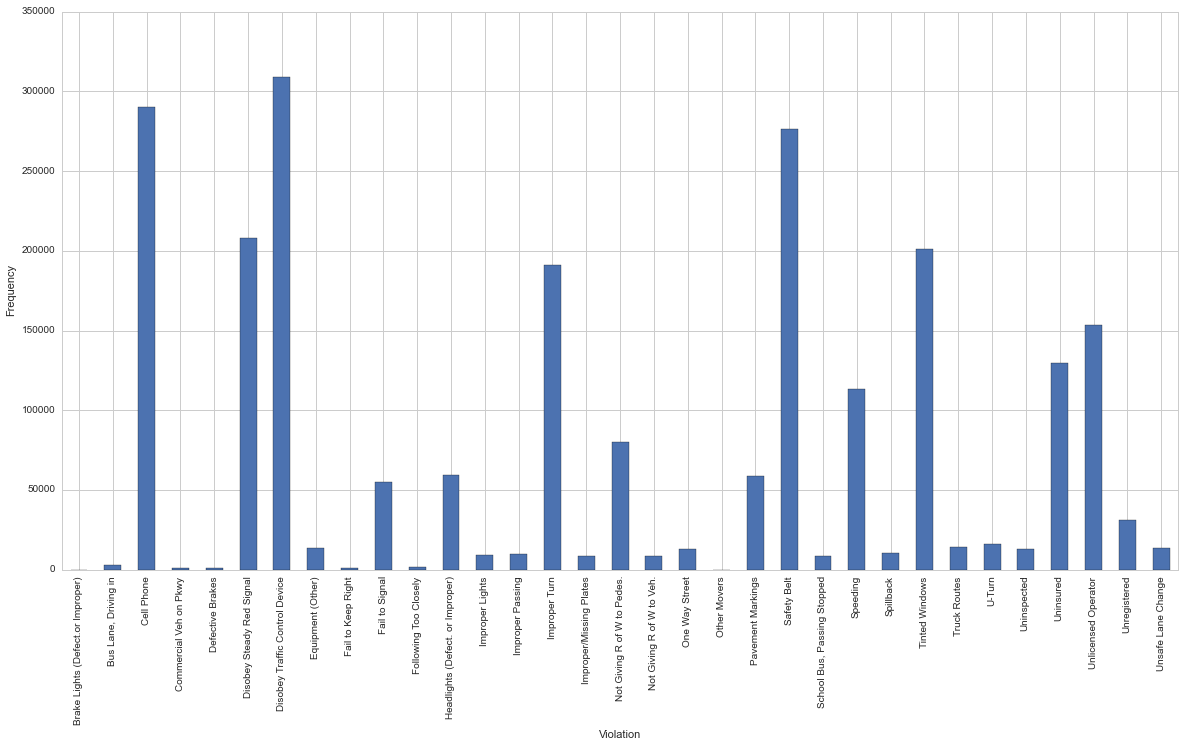

In [22]:
# Distribution of Violations for 2015
plt.figure(figsize=(20,10))
groupedViolation = nypdSummons.groupby('Violation')
freqPlot = groupedViolation['Totals'].sum().plot(kind='bar')
freqPlot.set_xlabel("Violation")
freqPlot.set_ylabel("Frequency")

>__"Based on the above plot distribution, only top 6 violations are used for the analysis. These violations would be Cell Phone, Disobey Steady Red Signal, Disobey Traffic Control Device, Improper Turn, Safety Belt, Tinted Windows."__

### Transposing summons to precinct level

In [23]:
# Subset only the required features
violationlist = ['Cell Phone', 'Disobey Steady Red Signal', 'Disobey Traffic Control Device',
                 'Improper Turn', 'Safety Belt', 'Tinted Windows']
nypdSummons1 = nypdSummons.loc[(nypdSummons.Violation.isin(violationlist)),]
print nypdSummons1.shape
print nypdSummons1.Violation.unique()

nypdSummons1 = nypdSummons1[['Precinct', 'Violation', 'Totals']]
print nypdSummons1.info()
nypdSummons1.head()

(462, 6)
[u'Cell Phone' u'Disobey Steady Red Signal'
 u'Disobey Traffic Control Device' u'Improper Turn' u'Safety Belt'
 u'Tinted Windows']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 2 to 2532
Data columns (total 3 columns):
Precinct     462 non-null int64
Violation    462 non-null object
Totals       462 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.4+ KB
None


,Precinct,Violation,Totals
2,1,Cell Phone,7229
5,1,Disobey Steady Red Signal,3603
6,1,Disobey Traffic Control Device,5427
14,1,Improper Turn,2342
20,1,Safety Belt,3996


In [24]:
# Creating an empty dictionary with violation names as keys
violationlist = ['Cell Phone', 'Disobey Steady Red Signal', 'Disobey Traffic Control Device',
                 'Improper Turn', 'Safety Belt', 'Tinted Windows']
precinctSummons = {x:{} for x in violationlist} # Using dictionary comprehensions
print precinctSummons

precinctlist = list(nypdSummons1.Precinct.unique())

for i in violationlist:
    df = nypdSummons1.loc[nypdSummons1.Violation == i,]
    for n in precinctlist:
        precinctSummons[i][n] = df.loc[df.Precinct == n, 'Totals'].values[0]

{'Improper Turn': {}, 'Tinted Windows': {}, 'Safety Belt': {}, 'Cell Phone': {}, 'Disobey Steady Red Signal': {}, 'Disobey Traffic Control Device': {}}


In [25]:
precinctSummons

{'Cell Phone': {1: 7229.0,
  5: 1569.0,
  6: 4274.0,
  7: 3767.0,
  9: 5348.0,
  10: 4610.0,
  13: 1933.0,
  14: 9145.0,
  17: 1746.0,
  18: 5963.0,
  19: 4356.0,
  20: 7090.0,
  22: 1003.0,
  23: 6261.0,
  24: 4761.0,
  25: 5091.0,
  26: 3376.0,
  28: 3714.0,
  30: 4389.0,
  32: 2021.0,
  33: 3233.0,
  34: 1718.0,
  40: 2689.0,
  41: 1013.0,
  42: 2075.0,
  43: 1671.0,
  44: 2349.0,
  45: 1755.0,
  46: 2112.0,
  47: 1779.0,
  48: 2748.0,
  49: 1934.0,
  50: 2265.0,
  52: 1895.0,
  60: 3276.0,
  61: 5624.0,
  62: 2614.0,
  63: 3269.0,
  66: 4462.0,
  67: 3416.0,
  68: 3570.0,
  69: 5577.0,
  70: 6189.0,
  71: 5998.0,
  72: 2294.0,
  73: 6612.0,
  75: 4028.0,
  76: 3942.0,
  77: 3413.0,
  78: 3867.0,
  79: 3885.0,
  81: 5084.0,
  83: 3894.0,
  84: 2403.0,
  88: 5787.0,
  90: 4195.0,
  94: 2352.0,
  100: 1654.0,
  101: 2262.0,
  102: 3169.0,
  103: 4686.0,
  104: 3326.0,
  105: 3635.0,
  106: 1969.0,
  107: 2975.0,
  108: 4011.0,
  109: 7333.0,
  110: 5027.0,
  111: 7719.0,
  112: 3592.0

In [26]:
# Converting dict of dicts into a data frame
precinctSummonsAgg = pd.DataFrame.from_dict(precinctSummons)
precinctSummonsAgg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 123
Data columns (total 6 columns):
Cell Phone                        77 non-null float64
Disobey Steady Red Signal         77 non-null float64
Disobey Traffic Control Device    77 non-null float64
Improper Turn                     77 non-null float64
Safety Belt                       77 non-null float64
Tinted Windows                    77 non-null float64
dtypes: float64(6)
memory usage: 4.2 KB


In [27]:
# Precinct values are under the index of data frame
precinctSummonsAgg.index

Int64Index([  1,   5,   6,   7,   9,  10,  13,  14,  17,  18,  19,  20,  22,
             23,  24,  25,  26,  28,  30,  32,  33,  34,  40,  41,  42,  43,
             44,  45,  46,  47,  48,  49,  50,  52,  60,  61,  62,  63,  66,
             67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,  81,
             83,  84,  88,  90,  94, 100, 101, 102, 103, 104, 105, 106, 107,
            108, 109, 110, 111, 112, 113, 114, 115, 120, 121, 122, 123],
           dtype='int64')

In [28]:
# Checking for first few observations
precinctSummonsAgg.head()

,Cell Phone,Disobey Steady Red Signal,Disobey Traffic Control Device,Improper Turn,Safety Belt,Tinted Windows
1,7229,3603,5427,2342,3996,1552
5,1569,3157,4805,5273,1573,505
6,4274,3960,3348,3032,3383,500
7,3767,3134,4533,2929,2331,855
9,5348,3330,3891,2567,3076,366


In [29]:
# Exporting data to be used in the final analysis
precinctSummonsAgg.reset_index().to_csv("precinct_summons.csv")